# Preliminary Loading and Calcuation

In [2]:
import os, pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

os.chdir("/home/dawnis/Dropbox/Insight/SmartMirror_Demo/")

In [5]:
from src.fashion_tools import DeepFashion_Attributes

#first, generate a dictionary that breaks down each

with open('models/img_attr_sparse.pkl', 'rb') as S:
    img_attr_values = pickle.load(S)

with open ('models/img_attr_rows.pkl', 'rb') as S:
    img_attr_rows = pickle.load(S)
    
with open('models/img_attr_columns.pkl', 'rb') as S:
    img_attr_columns = pickle.load(S)

img_attr_values = img_attr_values.toarray()
img_attr_df = pd.DataFrame(img_attr_values, columns = img_attr_columns, index=img_attr_rows)


img_attr_sum = img_attr_df.sum(axis=0)

img_attr_df.head(5)

,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,abstract floral print,abstract geo,abstract geo print,abstract paisley,...,zeppelin,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered
img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
att_vector = DeepFashion_Attributes("Top", img_attr_df)
relative_frequency = att_vector.sum(axis=0)/att_vector.shape[0]

In [45]:
relative_frequency[0]

0.0008930343322087716

In [48]:
probOneRandom = 1 - np.prod(1 - relative_frequency** 2)
probFiveRandom = 1 - np.prod( ( 1 -  relative_frequency ** 2  ) ** 5)
print(probOneRandom)
print(probFiveRandom)

0.15376834640335058
0.5660433667235547


In [5]:
#dvAll = np.load("features/u_current_feature_vector_dotv.npy")
#dvHog = np.load("features/u_hog_dotv.npy")
#dvAE = np.load("features/u_encoder_dotv.npy")
#dvHSV = np.load("features/u_hsv_dotv.npy")

pAll = pickle.load(open( "u_current_feature_vector_ProbAttMatch.p", 'rb' ) )
pHOG = pickle.load(open( "u_hog_ProbAttMatch.p", 'rb' ) )
pHSV = pickle.load(open( "u_hsv_ProbAttMatch.p", 'rb' ) )
pAE = pickle.load(open( "u_encoder_ProbAttMatch.p", 'rb'))

overlap_top5 = np.load("features/overlap_scores.npy")
overlap_top_ten = np.load("features/overlap_scores10.npy")

In [51]:
items_to_examine = [pAll, pHOG, pHSV, pAE]

for pb in items_to_examine:
    pbTopMatch = np.zeros((1,1000))
    pbFiveMatch = np.zeros((1,1000))
    for obj in pb:
        objMat = obj.toarray()
        pbTopMatch += objMat[0]
        pbFiveMatch += np.max(objMat, axis=0)

    pbTopMatch /= len(pb)
    pbFiveMatch /= len(pb)

    pbOne = 1 - np.prod(1-pbTopMatch)
    pbFiveMatch = 1 - np.prod(1-pbFiveMatch)
    
    print("P(One or More) =  {:2.2f} and P(One or More) in five = {:2.2f}".format(pbOne*100, pbFiveMatch*100))

P(One or More) =  46.44 and P(One or More) in five = 72.01
P(One or More) =  44.99 and P(One or More) in five = 70.58
P(One or More) =  36.05 and P(One or More) in five = 65.00
P(One or More) =  37.15 and P(One or More) in five = 64.83


In [16]:
print(pbFiveMatch)

0.7201137049533763


# Overlaps

How many of the top N based on attribute vectors or feature similarity match? What about if we break them down by category?

In [10]:
dotsum = np.sum(att_vector*att_vector, axis=1)
perfect = np.mean(dotsum, axis=0)
print(perfect)

3.549513792419131


In [11]:
from src.fashion_tools import category_cloth_attr
attr_cloth = "labels/list_attr_cloth.txt"

attrDict = category_cloth_attr(attr_cloth)
len(attrDict)

1000

5


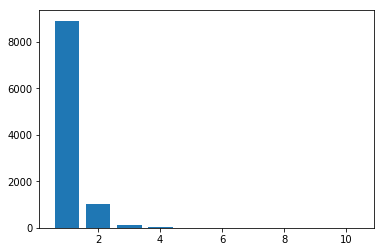

In [12]:
xhist, bn = np.histogram(overlap_top_ten, range=(0,10), bins=10)
plt.bar(bn[1:], xhist)
print(np.max(overlap_top_ten))

In [13]:
got = np.where(overlap_top_ten>0)[0]
gotsub = img_attr_df.iloc[got].copy()
gotsubsum = gotsub.sum(axis=0)

In [15]:
print(gotsub.shape[0])
1162/10078.

1162


0.11530065489184362

In [19]:
gotsubsum.drop(index = [row_name for row_name in gotsubsum.index if gotsubsum[row_name]==0], inplace=True)

In [21]:
share_category_h = np.zeros(5)
for key in gotsubsum.keys():
    share_category_h[ attrDict[key] -1 ] += gotsubsum[key]

print(share_category_h)

[ 732. 1111.  574. 1158.  538.]


In [23]:

total_numbers_h = np.zeros(5)
att_vector_sum = att_vector.sum(axis=0)

for key in att_vector_sum.keys():
    total_numbers_h[ attrDict[key] -1 ] += att_vector_sum[key]

print(total_numbers_h)
print(share_category_h/total_numbers_h)

[8047. 8419. 7771. 6478. 5057.]
[0.09096558 0.13196342 0.07386437 0.17875888 0.10638719]


# Some examples to compare attributes vs feature matching

In [3]:
import random
from src.fashion_tools import rgb_image_bounding_box, DeepFashion, fashion_similarity

def compute_similarity_index(choice, fv, deepKeys, topn):
    #choice = deepKeys[index]
    similarity_scores = fashion_similarity(choice, fv, deepKeys)
    similarity_scores[deepKeys.index(choice)] = np.max(similarity_scores)
    closest = np.argsort(np.array(similarity_scores))
    return [deepKeys[matc] for matc in closest[:topn]]

In [7]:
topDict = DeepFashion("Top")
deepKeys = [key for key in att_vector.index]

In [8]:
fv = np.load('features/u_current_feature_vector.npy')
fv.shape

(10078, 786)

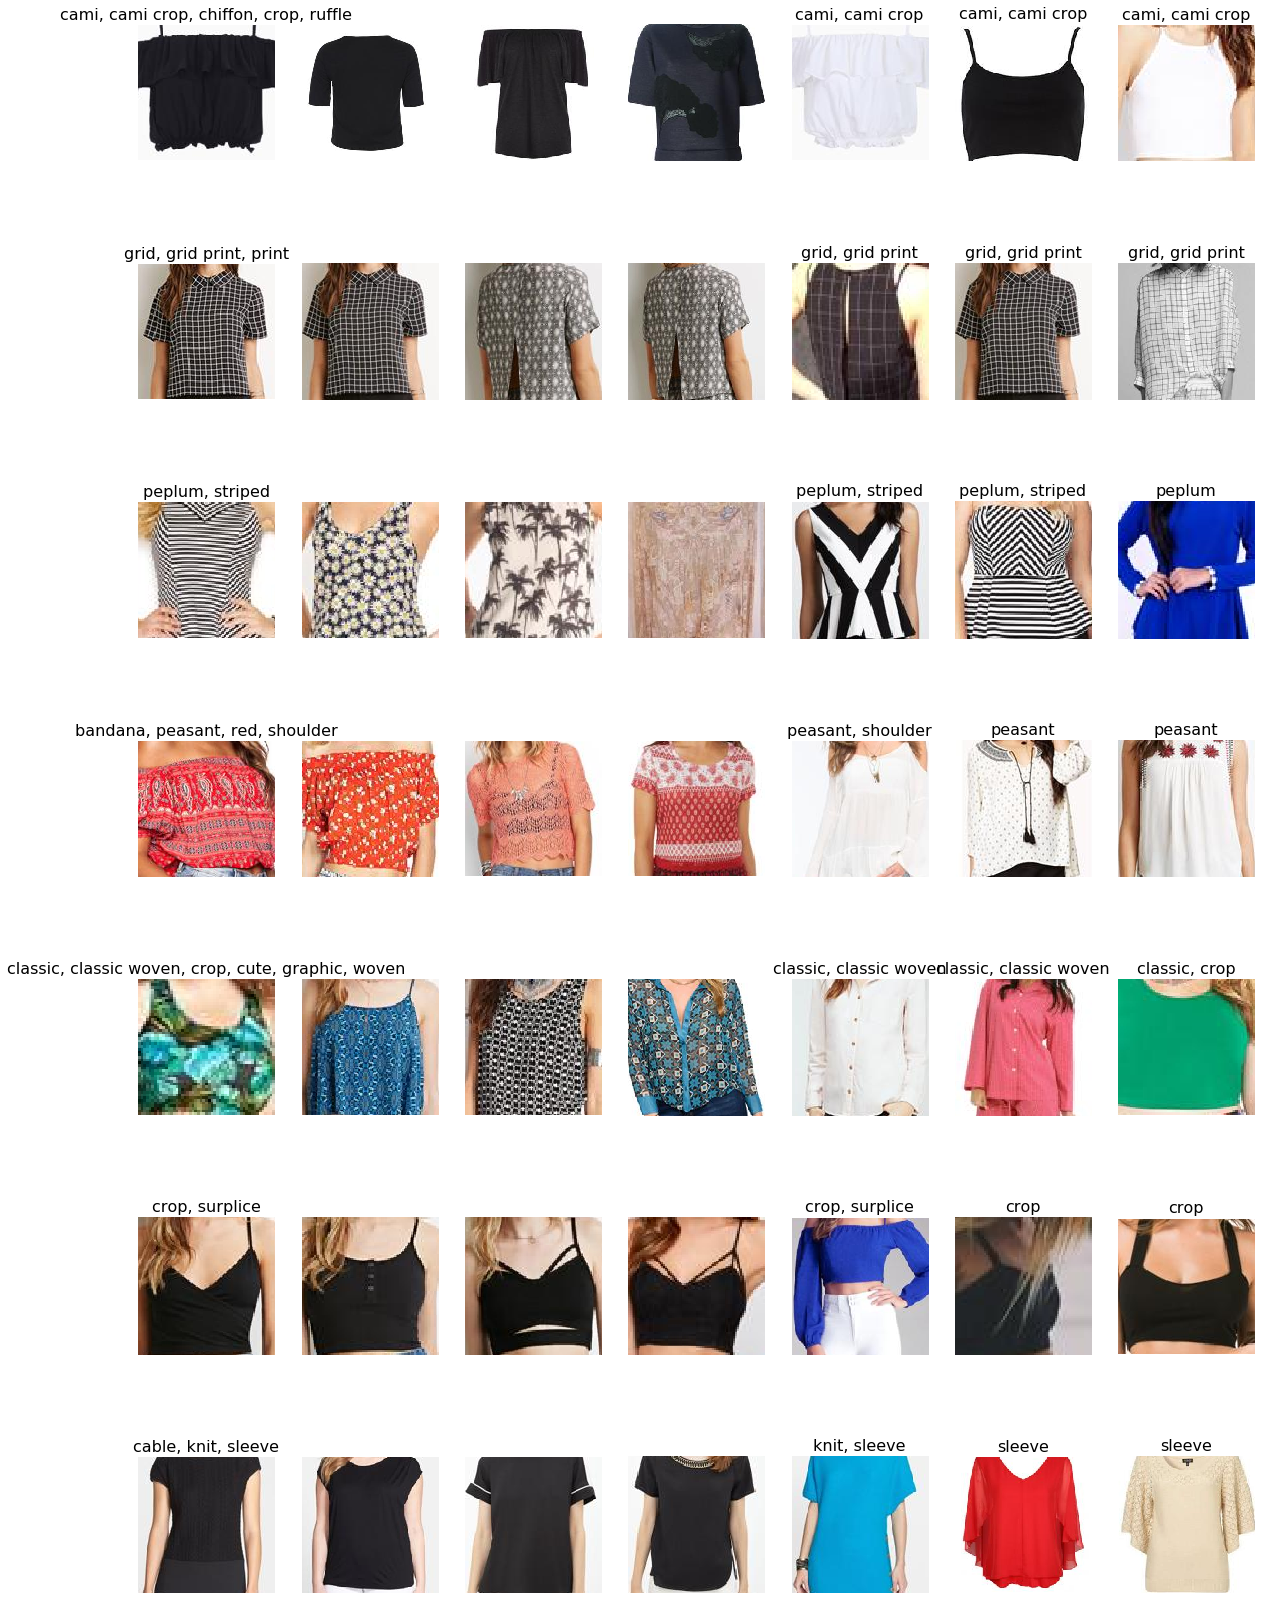

In [16]:
fig, ax = plt.subplots(7, 7)
fig.set_figwidth(20)
fig.set_figheight(30)

dfSample = random.sample(deepKeys,7)
plt.axis('off')
fullpath_to_data = "/home/dawnis/Data/SmartMirror/DeepFashion_Data"
dfSet = [rgb_image_bounding_box("/".join([fullpath_to_data,img]), topDict[img], convert_bgr=True, autocrop=True) for img in dfSample]

for row, img in enumerate(dfSample):
    bestMatch_fv = compute_similarity_index(img, fv, deepKeys, 3)
    keyAtt = att_vector.loc[img] == 1
    attnames = img_attr_columns[keyAtt]
    ax[row][0].imshow(dfSet[row])
    ax[row][0].set_title(", ".join(attnames), size='16')
    for col, fvImg in enumerate(bestMatch_fv):
        dat = rgb_image_bounding_box("/".join([fullpath_to_data, fvImg]), topDict[fvImg], convert_bgr=True, autocrop=True)
        ax[row][col + 1].imshow(dat)
    bestMatch_av = compute_similarity_index(img, att_vector.values, deepKeys, 3)
    for col, avImg in enumerate(bestMatch_av):
        matchAtt = att_vector.loc[avImg]
        attNames_idx = keyAtt & (matchAtt == 1)
        attNames = img_attr_columns[attNames_idx]
        dat = rgb_image_bounding_box("/".join([fullpath_to_data, avImg]), topDict[avImg], convert_bgr=True, autocrop=True)
        ax[row][col + 4].imshow(dat)
        ax[row][col + 4].set_title(", ".join(attNames[:2]), size='16')

for row in range(7):
    for col in range(7):
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
        ax[row][col].set_axis_off()


(10078, 256)
(10078, 18)
(10078, 512)


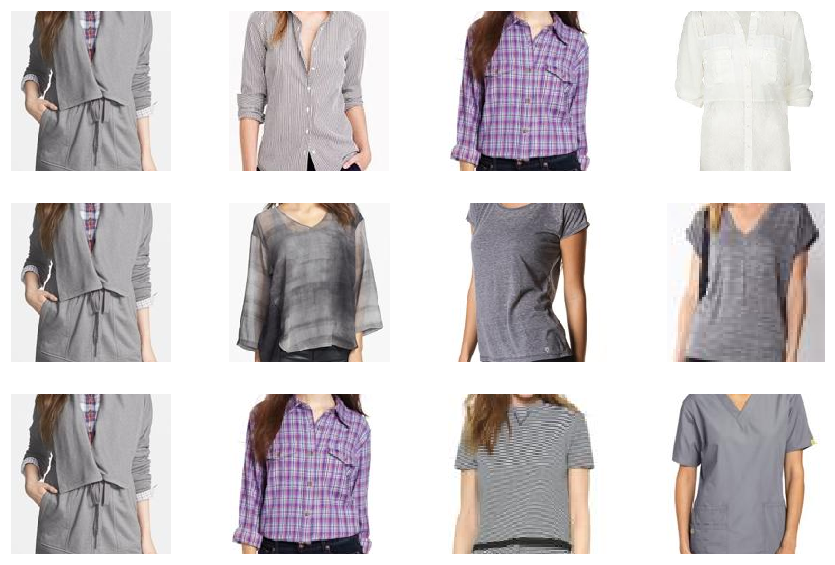

In [42]:
#produces the top 3 matches for a randomly chosen item using only subset feature vectors
fig, ax = plt.subplots(3, 4)
fig.set_figwidth(15)
fig.set_figheight(10)

dfSample = random.sample(deepKeys,1)
plt.axis('off')
fullpath_to_data = "/home/dawnis/Data/SmartMirror/DeepFashion_Data"
dfSet = [rgb_image_bounding_box("/".join([fullpath_to_data,img]), topDict[img], convert_bgr=True, autocrop=True) for img in dfSample]

featurev_to_use = ['features/u_hog.npy', 'features/u_hsv.npy', 'features/u_encoder.npy']

for row, feature_v in enumerate(featurev_to_use):
    fv = np.load(feature_v)
    print(fv.shape)
    bestMatch_fv = compute_similarity_index(dfSample[0], fv, deepKeys, 3)
    keyAtt = att_vector.loc[img] == 1
    ax[row][0].imshow(dfSet[0])
    for col, fvImg in enumerate(bestMatch_fv):
        dat = rgb_image_bounding_box("/".join([fullpath_to_data, fvImg]), topDict[fvImg], convert_bgr=True, autocrop=True)
        ax[row][col + 1].imshow(dat)

for row in range(3):
    for col in range(4):
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
        ax[row][col].set_axis_off()
